# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

fileNames = ["ainvert.py", "firetruck.jpg","lena.bmp","chessboard.bmp"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

#TODO Do samodzielnej implementacji

import ainvert

In [20]:
def bicubic_interpolation(I,fx,fy):
  def der_x(y,x):
    if x+1<I.shape[1] and x-1>=0:
      return (I[y][x+1]-I[y][x-1])/2
    else:
      return 0
  def der_y(y,x):
    if y+1<I.shape[0] and y-1>=0:
      return (I[y+1][x]-I[y-1][x])/2
    else:
      return 0
  def der_xy(y,x):
    if x+1<I.shape[1] and x-1>=0 and y+1<I.shape[0] and y-1>=0:
      return (I[y+1][x+1]-I[y][x-1]-I[y-1][x]+I[y][x])/4
    else:
      return 0

  new_I=np.zeros((int(fy*I.shape[0]),int(fx*I.shape[1])))
  for y in range(new_I.shape[0]):
    for x in range(new_I.shape[1]):
      a=np.array([int(y/fy),int(x/fx)])
      if a[0]+1<I.shape[0]:
        b=np.array([a[0]+1,a[1]])
      else:
        b=a
      if a[0]+1<I.shape[0] and a[1]+1<I.shape[1]:
        c=np.array([a[0]+1,a[1]+1])
      else:
        c=a
      if  a[1]+1<I.shape[1]:
        d=np.array([a[0],a[1]+1])
      else:
        d=a
      x_table=np.array([I[a[0],a[1]],I[b[0],b[1]],I[c[0],c[1]],I[d[0],d[1]],
                        der_x(a[0],a[1]),der_x(b[0],b[1]),der_x(c[0],c[1]),der_x(d[0],d[1]),
                        der_y(a[0],a[1]),der_y(b[0],b[1]),der_y(c[0],c[1]),der_y(d[0],d[1]),
                        der_xy(a[0],a[1]),der_xy(b[0],b[1]),der_xy(c[0],c[1]),der_xy(d[0],d[1])
                        ]) 
      alpha=np.matmul(ainvert.A_invert,x_table)
      for i in range(4):
        for j in range(4):
          new_I[y][x]+=alpha[i*4+j]*np.power(y/fy-a[0],i)*np.power(x/fx-a[1],j)
  return new_I

In [6]:
def plot_resized_I(I,fx,fy):
  plt.figure(figsize=(1*fx,1*fy), dpi=200)
  plt.imshow(I,"gray")
  plt.xticks([]), plt.yticks([])
  plt.show()

<ipython-input-20-c5599240951c>:14: RuntimeWarning: overflow encountered in ubyte_scalars
  return (I[y+1][x+1]-I[y][x-1]-I[y-1][x]+I[y][x])/4


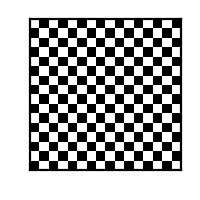

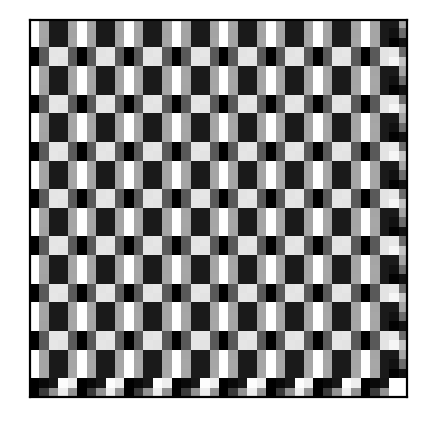

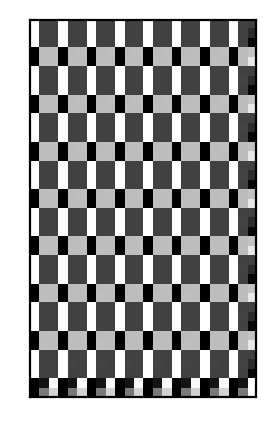

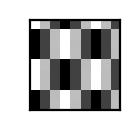

In [21]:
I=cv2.imread("chessboard.bmp")
I=cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
plot_resized_I(bicubic_interpolation(I,1,1),1,1)

plot_resized_I(bicubic_interpolation(I,2.5,2.5),2.5,2.5)

plot_resized_I(bicubic_interpolation(I,1.5,2.5),1.5,2.5)

plot_resized_I(bicubic_interpolation(I,0.6,0.6),0.6,0.6)



<ipython-input-20-c5599240951c>:4: RuntimeWarning: overflow encountered in ubyte_scalars
  return (I[y][x+1]-I[y][x-1])/2
<ipython-input-20-c5599240951c>:14: RuntimeWarning: overflow encountered in ubyte_scalars
  return (I[y+1][x+1]-I[y][x-1]-I[y-1][x]+I[y][x])/4
<ipython-input-20-c5599240951c>:9: RuntimeWarning: overflow encountered in ubyte_scalars
  return (I[y+1][x]-I[y-1][x])/2


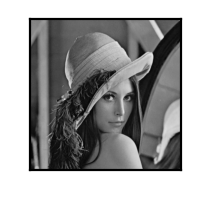

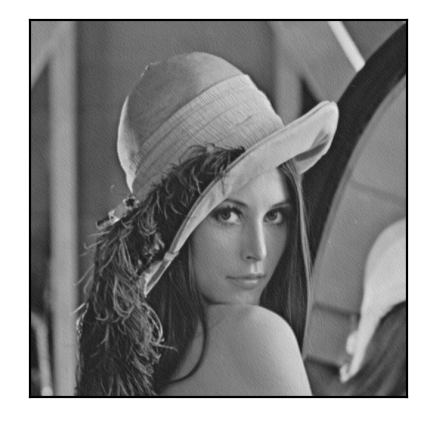

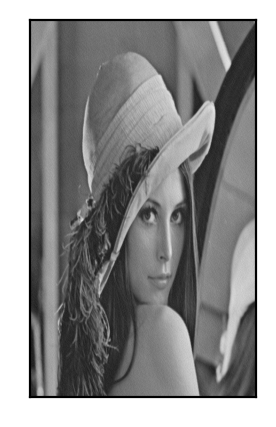

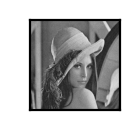

In [22]:
I=cv2.imread("lena.bmp")
I=cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)


plot_resized_I(bicubic_interpolation(I,1,1),1,1)

plot_resized_I(bicubic_interpolation(I,2.5,2.5),2.5,2.5)

plot_resized_I(bicubic_interpolation(I,1.5,2.5),1.5,2.5)

plot_resized_I(bicubic_interpolation(I,0.6,0.6),0.6,0.6)
